# Predicción de Procesos Judiciales

OBJETIVO

El objetivo de este proyecto de ML es predecir o proyectar la demanda de procesos judiciales en los juzgados penales con la finalidad de tomar decisiones administrativas que permitan gestionarla adecuadamente.
Actualmente la Rama Judicial no cuenta con buenos estimativos sobre la demanda de justicia y otra información de contexto para los próximos años que podrían ayudar en la toma de decisiones de manera anticipada. En la actualidad se hacen cálculos de pronósticos a corto plazo sobre la posible demanda de justicia en los despachos judiciales.
Este proyecto permitirá contar con información de proyecciones de la demanda de justicia para fundamentar las políticas y acciones de la administración judicial en temas de ajuste de la oferta, modelos de atención al público y otras medidas con el fin de optimizar el servicio frente al comportamiento de la demanda.








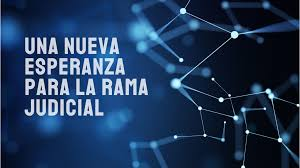

# PIPELINE ALGORITMOS DE REGRESIÓN

# 1. PIPELINE/RECOLECCIÓN DE DATOS

1. Importar y Leer el DataSet

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import scipy.stats as stats

from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Leer el DataSet
data_procesoXGBoot = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASET/dataset_procesos_judiciales1.csv",encoding='latin-1')

# Hacer una copia del DataSet original
df = data_procesoXGBoot.copy()

# 2. PIPELINE/ANÁLISIS EXPLORATORIO DE DATOS (EDA)





# Comprendiendo los Datos

In [ ]:
# Conocer en Detalle la estructura del DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   año                        1410 non-null   int64  
 1   trimestre                  1410 non-null   int64  
 2   ciudad                     1410 non-null   object 
 3   subespecialidad            1410 non-null   object 
 4   Total_procesos             1410 non-null   int64  
 5   TOTAL_INDICIADOS           1410 non-null   float64
 6   TOTAL_NOTICIAS_CRIMINALES  1410 non-null   float64
 7   TOTAL_VICTIMAS_FISCALIA    1410 non-null   float64
 8   VICTIMAS_UNIDAD_VICTIMAS   1410 non-null   float64
 9   Total_Poblacion            1410 non-null   float64
 10  RGN                        1410 non-null   float64
 11  COVID                      1410 non-null   int64  
 12  LEY_1878_2018              1410 non-null   int64  
dtypes: float64(6), int64(5), object(2)
memory usage:

In [ ]:
# Mostrar 5 filas de manera aleatoria
df.sample(5)

,año,trimestre,ciudad,subespecialidad,Total_procesos,TOTAL_INDICIADOS,TOTAL_NOTICIAS_CRIMINALES,TOTAL_VICTIMAS_FISCALIA,VICTIMAS_UNIDAD_VICTIMAS,Total_Poblacion,RGN,COVID,LEY_1878_2018
942,2019,2,Pasto,EJECUCION DE PENAS Y MEDIDAS DE SEGURIDAD,493,553.200000,354.450000,1002.100000,3.500000,16364.50000,4.060230,0,1
180,2013,3,Cali,EJECUCION DE PENAS Y MEDIDAS DE SEGURIDAD,2277,1937.133333,4620.866667,3359.333333,162.041667,90508.50000,13.513555,0,0
1209,2022,3,Bucaramanga,PENAL ESPECIALIZADO,175,668.266667,2099.600000,1902.400000,6.041667,25421.87500,16.021071,0,1
204,2013,3,Medellin,EJECUCION DE PENAS Y MEDIDAS DE SEGURIDAD,6270,2515.400000,5864.066667,3843.933333,700.500000,94457.04167,10.338171,0,0
283,2014,4,Bucaramanga,PENAL,1600,408.833333,901.133333,415.466667,10.375000,22851.95833,15.422889,0,0


In [ ]:
# Calculemos cuanto datos nulos hay, y mostremos un porcentaje de esos datos nulos si se encuentran presentes
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"Cuantos Nulos": missing_count, "Porcentaje": missing_percentage})
missing_df

,Cuantos Nulos,Porcentaje
año,0,0.0
trimestre,0,0.0
ciudad,0,0.0
subespecialidad,0,0.0
Total_procesos,0,0.0
TOTAL_INDICIADOS,0,0.0
TOTAL_NOTICIAS_CRIMINALES,0,0.0
TOTAL_VICTIMAS_FISCALIA,0,0.0
VICTIMAS_UNIDAD_VICTIMAS,0,0.0
Total_Poblacion,0,0.0


Los features año,trimestre,total_procesos,total_indiciados,total_noticias_criminales, total_victimas_fiscalia,victimas_unidad_victimas,Total_poblacion, RGN, COVID y ley 1878 de 2018 son numericas  y continuas.
Los features ciudad y subespecialidad son categoricas.

In [ ]:
# Estadisticas Básicas que se pueden aplicar a las columnas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
año,1410.0,2017.446809,3.470295,2012.000000,2014.000000,2017.000000,2021.000000,2023.000000
trimestre,1410.0,2.510638,1.127859,1.000000,1.000000,3.000000,4.000000,4.000000
Total_procesos,1410.0,2326.872340,3931.782070,0.000000,348.250000,1010.000000,2214.000000,38596.000000
TOTAL_INDICIADOS,1410.0,3236.712340,4110.119415,202.550000,752.733333,1765.766667,3948.666667,20912.250000
TOTAL_NOTICIAS_CRIMINALES,1410.0,4564.669645,5656.451718,292.266667,1094.600000,2164.033333,5692.866667,32255.800000
TOTAL_VICTIMAS_FISCALIA,1410.0,3718.553262,5112.406556,203.266667,837.050000,1723.233333,4245.533333,30643.600000
VICTIMAS_UNIDAD_VICTIMAS,1410.0,87.715603,178.586202,1.375000,9.875000,30.666667,60.333333,1091.708333
Total_Poblacion,1410.0,109130.575356,107287.605233,15930.541670,22851.958330,91900.625000,106208.666700,329470.041700
RGN,1410.0,11.944978,4.774236,0.026398,11.269745,13.928422,15.290249,16.074791
COVID,1410.0,0.148936,0.356152,0.000000,0.000000,0.000000,0.000000,1.000000


# Data Visualización

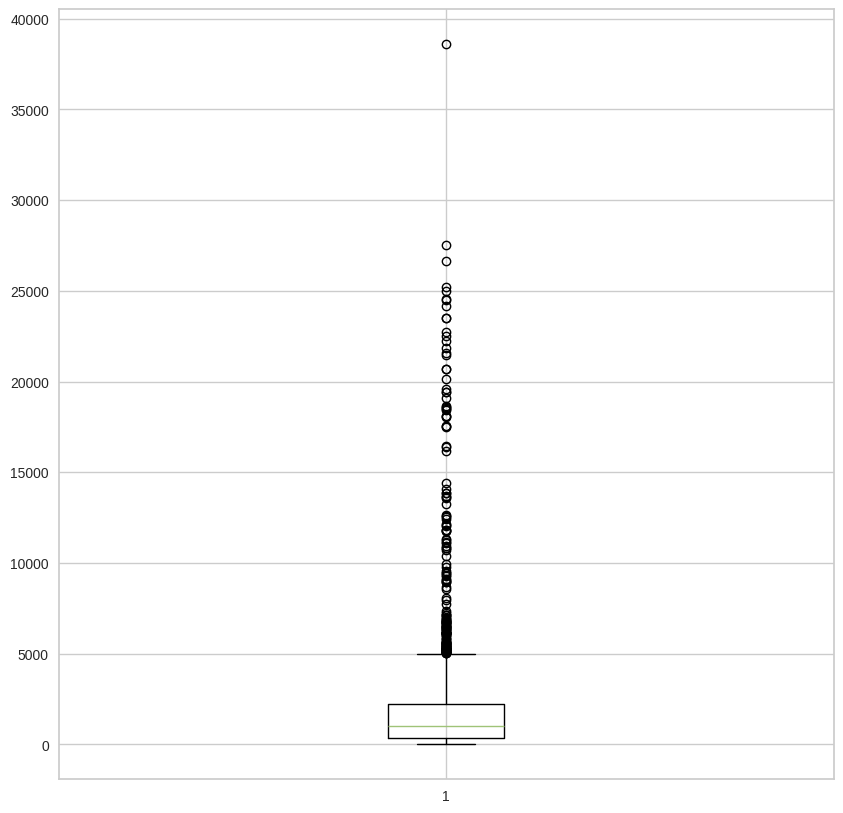

In [ ]:
fig = plt.figure(figsize =(10, 10))

plt.boxplot(df['Total_procesos'])
plt.show()



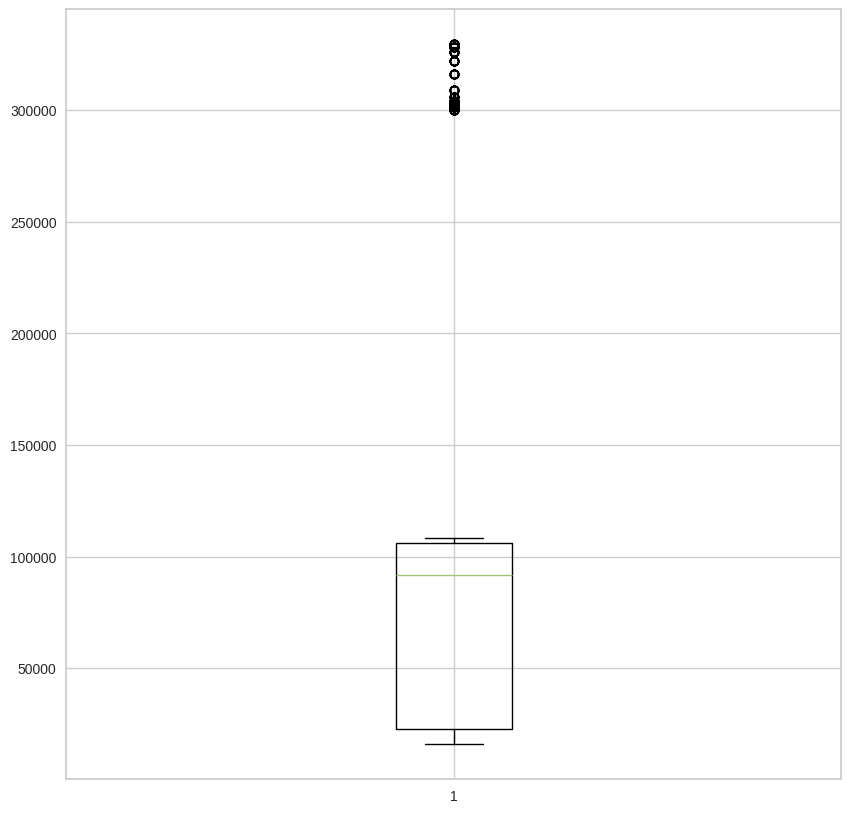

In [ ]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(df['Total_Poblacion'])
plt.show()

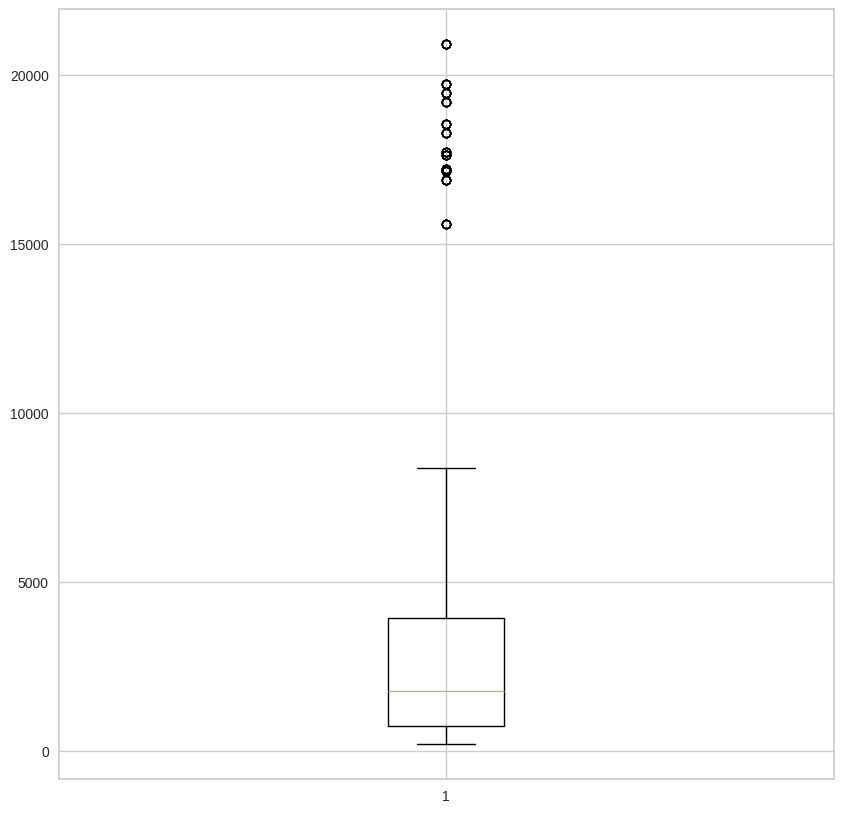

In [ ]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(df['TOTAL_INDICIADOS'])
plt.show()


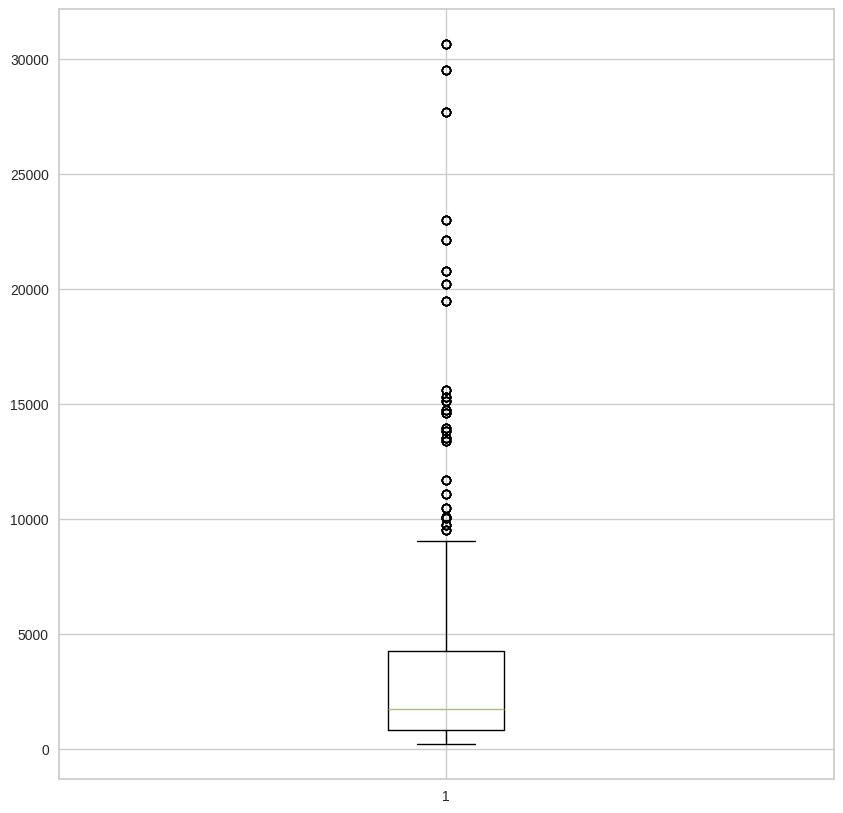

In [ ]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(df['TOTAL_VICTIMAS_FISCALIA'])
plt.show()

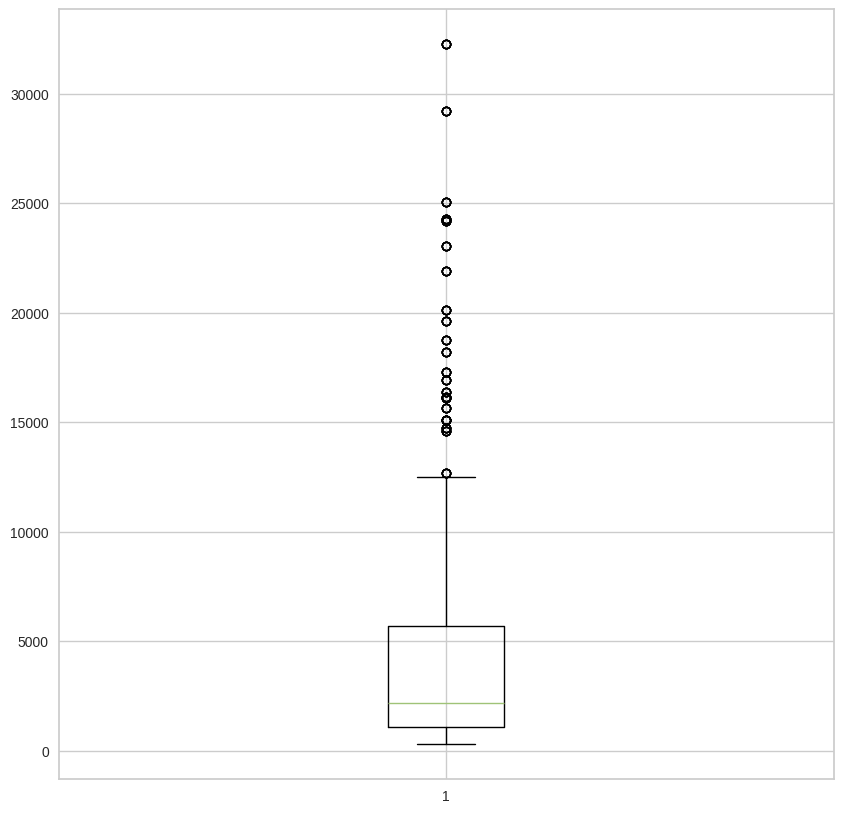

In [ ]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(df['TOTAL_NOTICIAS_CRIMINALES'])
plt.show()

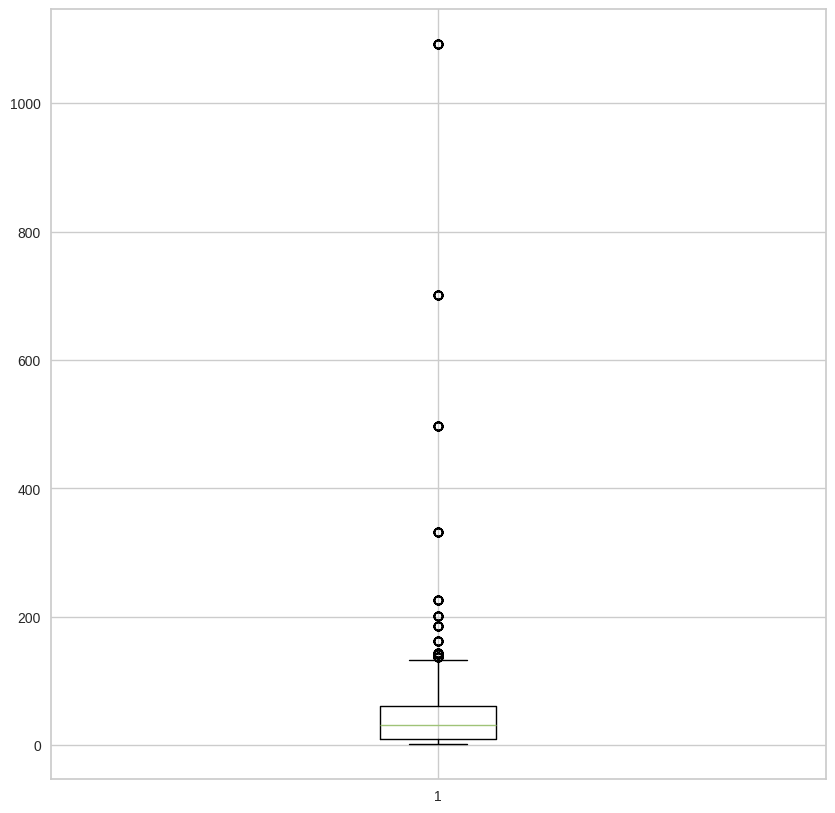

In [ ]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(df['VICTIMAS_UNIDAD_VICTIMAS'])
plt.show()

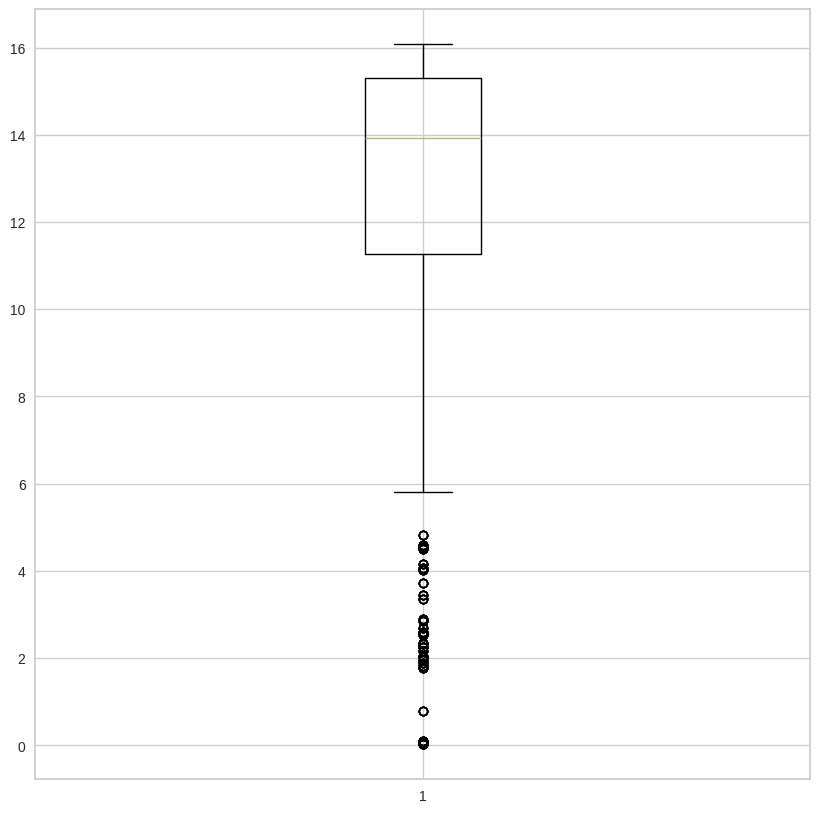

In [ ]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(df['RGN'])
plt.show()

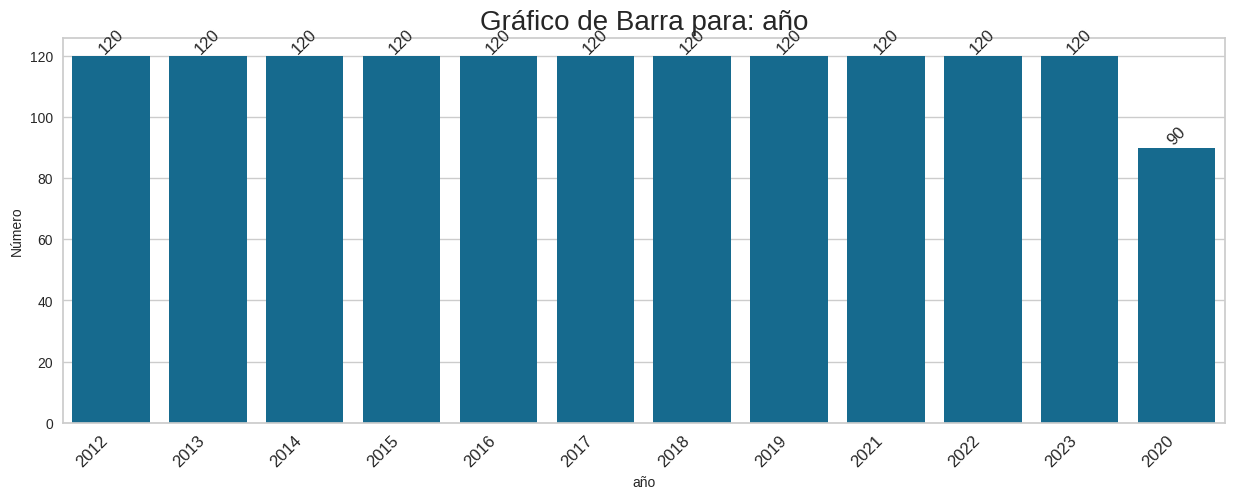

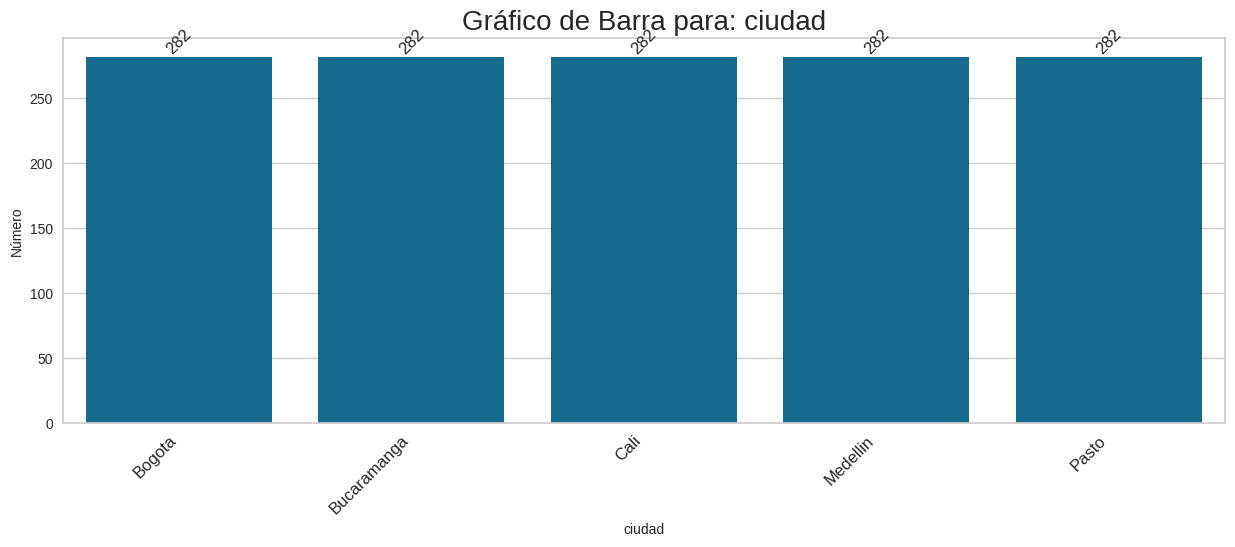

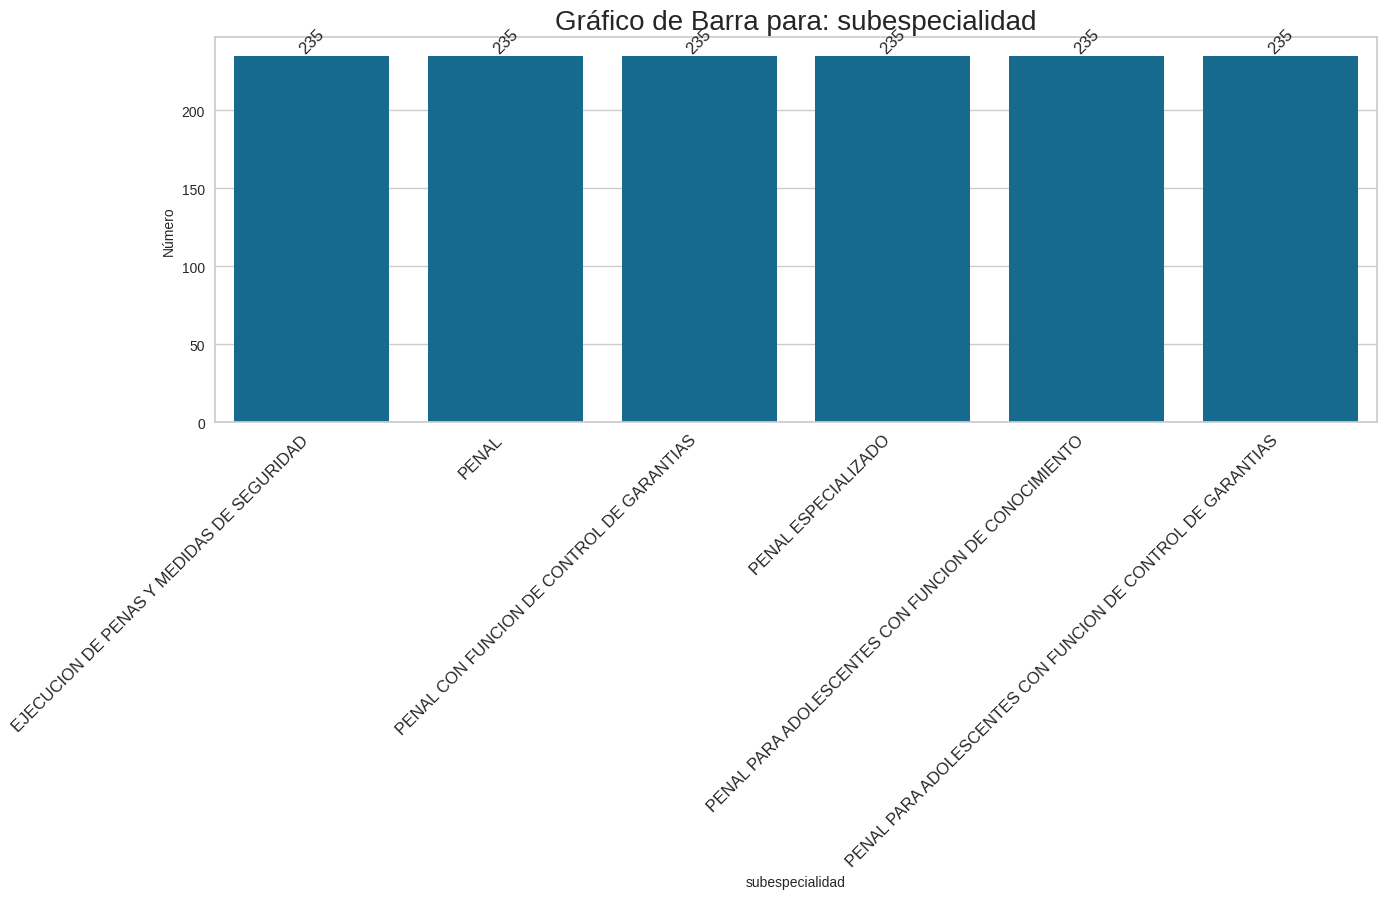

In [ ]:
# Observemos a continuacion como estan distribuidas las columnas categoricas haciendo uso de graficos de barra
import plotly.graph_objects as go
import plotly.express as px

def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Número', fontsize=10)
        plt.title(f'Gráfico de Barra para: {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()

cat_features = ['año','ciudad','subespecialidad']

plot_bar_graphs(df, cat_features)

# Análizemos nuestra variable objetivo 'Total Procesos' frente a las caracteristicas año, ciudad y subespecialidad

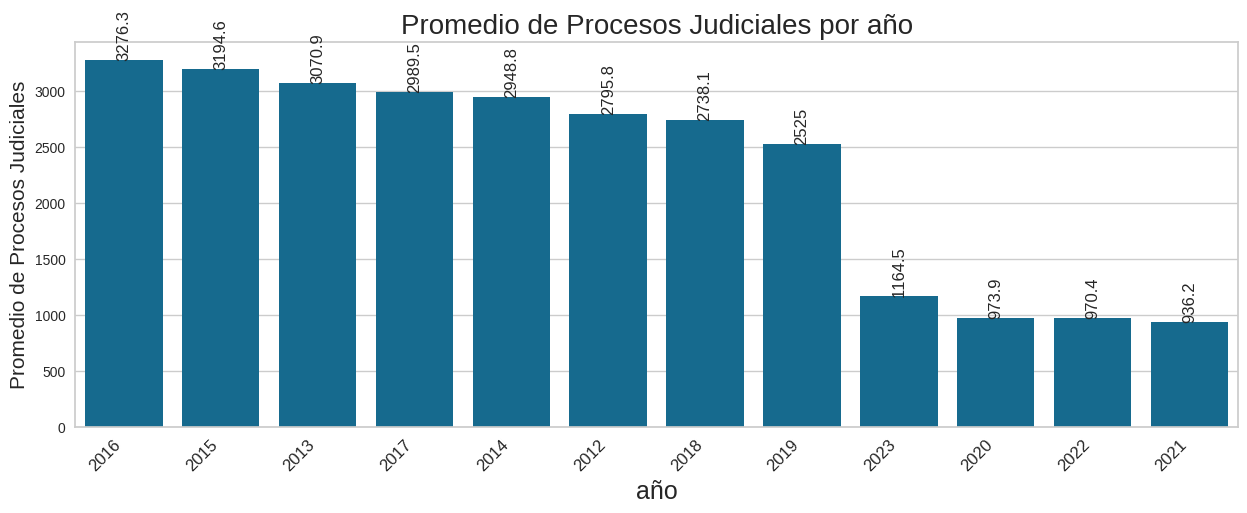

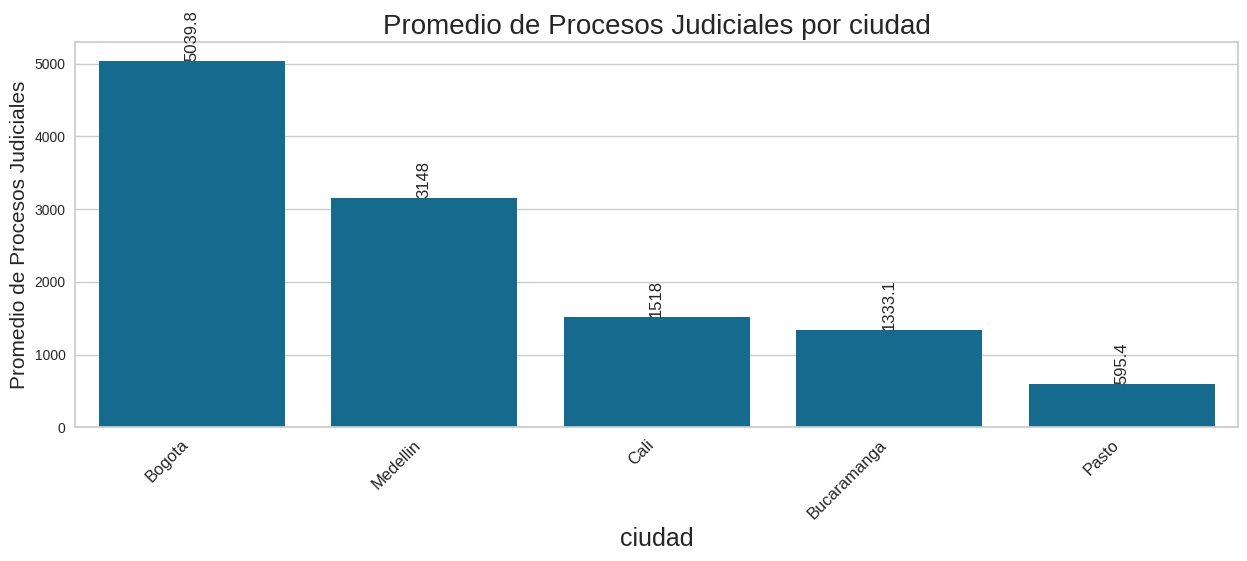

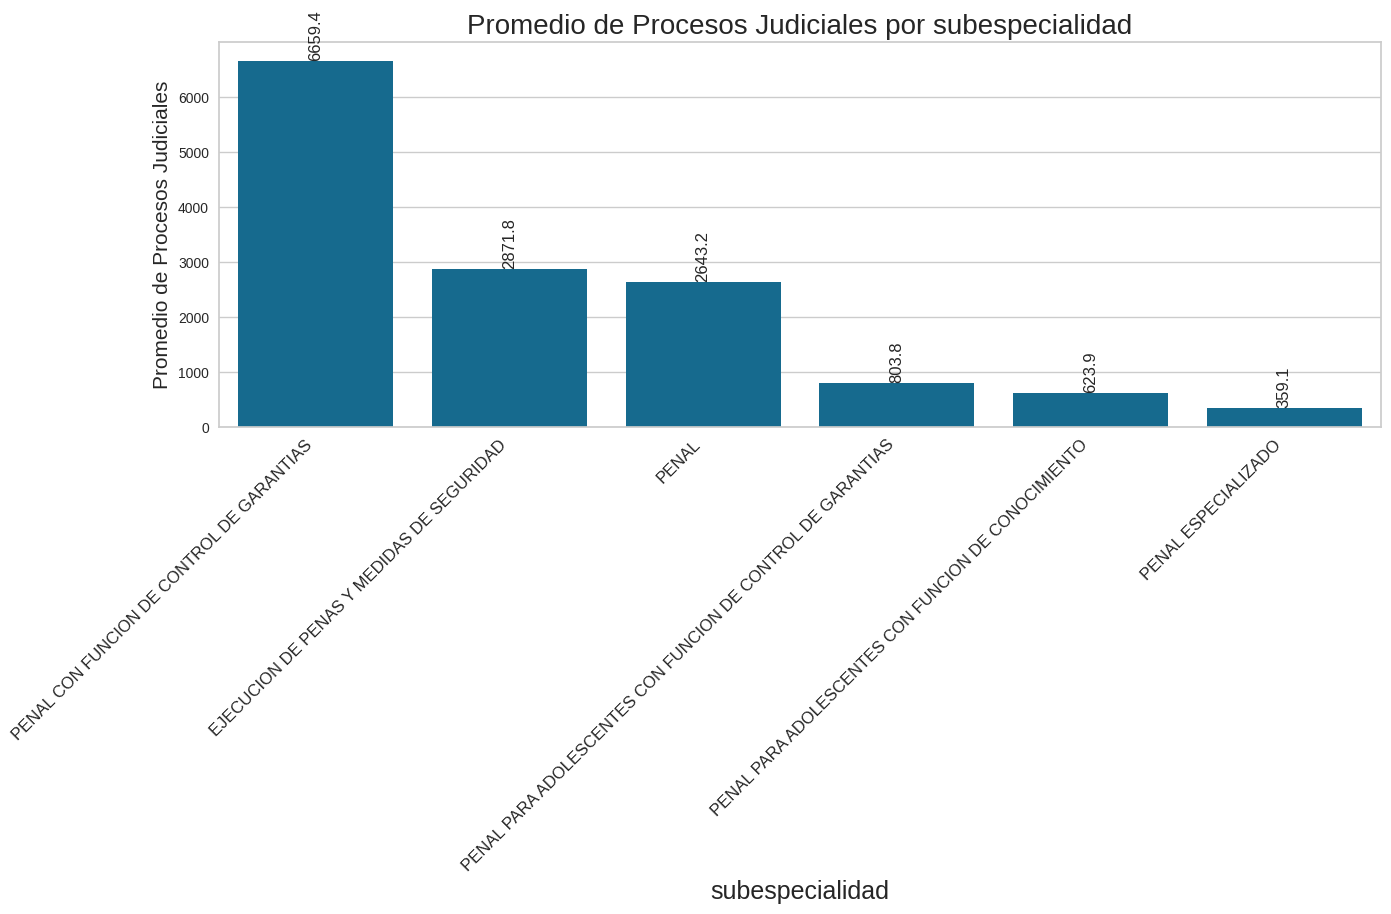

In [ ]:
def plot_bar_with_co2(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        grouped_data = df.groupby(column)['Total_procesos'].mean().round(1).reset_index()
        grouped_data_sorted = grouped_data.sort_values(by='Total_procesos', ascending=False)
        ax = sns.barplot(x=column, y='Total_procesos', data=grouped_data_sorted, order=grouped_data_sorted[column])
        ax.bar_label(ax.containers[0],rotation=90)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Promedio de Procesos Judiciales', fontsize=15)
        plt.title(f'Promedio de Procesos Judiciales por {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()

plot_bar_with_co2(df, cat_features)

# Conclusiones de los gráficos observados anteriormente:

Como se puede ver en los gráficos anteriores:



*   Bogota y Medelin poseen el promedio de procesos judiciales mas altos respectivamente.
*   Los años 2016 y 2015 fueron los años con mayor promedio de procesos judiciales
*   Penal con funcion de control de garantias es la subespecialidad con el promedio más alto de procesos judiciales.









# Escalado de Características Numéricas

In [ ]:
# Seleccionamos las columnas numéricas del dataset que tienen una relacion directa, no es necesario incluir aquellas columnas numericas cuya medida es muy especifica y propia.
numerical_features = ['Total_procesos', 'TOTAL_INDICIADOS', 'TOTAL_NOTICIAS_CRIMINALES', 'TOTAL_VICTIMAS_FISCALIA', 'VICTIMAS_UNIDAD_VICTIMAS', 'Total_Poblacion','RGN']

# Ahora escalaremos las columnas numéricas están escaladas entre 0 y 1 - haciendo uso de scaler de la libreria sklearn
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

scaler_robust = RobustScaler()
df[numerical_features] = scaler_robust.fit_transform(df[numerical_features])

# Imprimir el DataFrame completo con las características escaladas
print("DataFrame con características escaladas:")
df



DataFrame con características escaladas:


,año,trimestre,ciudad,subespecialidad,Total_procesos,TOTAL_INDICIADOS,TOTAL_NOTICIAS_CRIMINALES,TOTAL_VICTIMAS_FISCALIA,VICTIMAS_UNIDAD_VICTIMAS,Total_Poblacion,RGN,COVID,LEY_1878_2018
0,2012,1,Bogota,EJECUCION DE PENAS Y MEDIDAS DE SEGURIDAD,5.765510,5.250365,1.991221,-0.166315,0.587944,2.494483,-0.092580,0,0
1,2012,1,Bogota,PENAL,4.418062,5.250365,1.991221,-0.166315,0.587944,2.494483,-0.092580,0,0
2,2012,1,Bogota,PENAL CON FUNCION DE CONTROL DE GARANTIAS,9.883961,5.250365,1.991221,-0.166315,0.587944,2.494483,-0.092580,0,0
3,2012,1,Bogota,PENAL ESPECIALIZADO,-0.281924,5.250365,1.991221,-0.166315,0.587944,2.494483,-0.092580,0,0
4,2012,1,Bogota,PENAL PARA ADOLESCENTES CON FUNCION DE CONOCIM...,-0.153826,5.250365,1.991221,-0.166315,0.587944,2.494483,-0.092580,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,2023,4,Pasto,PENAL,-0.132922,-0.478572,-0.291044,-0.262590,-0.444261,-0.897138,-1.802351,0,1
1406,2023,4,Pasto,PENAL CON FUNCION DE CONTROL DE GARANTIAS,-0.385368,-0.478572,-0.291044,-0.262590,-0.444261,-0.897138,-1.802351,0,1
1407,2023,4,Pasto,PENAL ESPECIALIZADO,-0.475948,-0.478572,-0.291044,-0.262590,-0.444261,-0.897138,-1.802351,0,1
1408,2023,4,Pasto,PENAL PARA ADOLESCENTES CON FUNCION DE CONOCIM...,-0.458261,-0.478572,-0.291044,-0.262590,-0.444261,-0.897138,-1.802351,0,1


# Aplicar Encoding a las características categóricas

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Copiar el dataset para evitar modificar el original directamente
df_labeled = df.copy()

# Listar las columnas categóricas
categorical_columns = ['ciudad', 'subespecialidad']

# Aplicar Label Encoding para cada columna categórica
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_labeled[column] = le.fit_transform(df_labeled[column])
    label_encoders[column] = le

# Mostrar las primeras filas del Dataframe codificado(encoded)
#print(df_labeled.head())
df_labeled.head(1000)

,año,trimestre,ciudad,subespecialidad,Total_procesos,TOTAL_INDICIADOS,TOTAL_NOTICIAS_CRIMINALES,TOTAL_VICTIMAS_FISCALIA,VICTIMAS_UNIDAD_VICTIMAS,Total_Poblacion,RGN,COVID,LEY_1878_2018
0,2012,1,0,0,5.765510,5.250365,1.991221,-0.166315,0.587944,2.494483,-0.092580,0,0
1,2012,1,0,1,4.418062,5.250365,1.991221,-0.166315,0.587944,2.494483,-0.092580,0,0
2,2012,1,0,2,9.883961,5.250365,1.991221,-0.166315,0.587944,2.494483,-0.092580,0,0
3,2012,1,0,3,-0.281924,5.250365,1.991221,-0.166315,0.587944,2.494483,-0.092580,0,0
4,2012,1,0,4,-0.153826,5.250365,1.991221,-0.166315,0.587944,2.494483,-0.092580,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020,4,1,5,-0.397159,-0.465686,-0.311973,-0.357539,-0.580512,-0.802533,-0.266699,1,1
996,2020,1,2,0,0.071821,0.568504,0.239442,-0.196867,-0.315442,0.029398,0.250835,1,1
997,2020,1,2,1,-0.187592,0.568504,0.239442,-0.196867,-0.315442,0.029398,0.250835,1,1
998,2020,1,2,2,0.039126,0.568504,0.239442,-0.196867,-0.315442,0.029398,0.250835,1,1


# Encoding realizado



In [ ]:
# Imprimimos la información del DataSet codificado (encoded)
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   año                        1410 non-null   int64  
 1   trimestre                  1410 non-null   int64  
 2   ciudad                     1410 non-null   int64  
 3   subespecialidad            1410 non-null   int64  
 4   Total_procesos             1410 non-null   float64
 5   TOTAL_INDICIADOS           1410 non-null   float64
 6   TOTAL_NOTICIAS_CRIMINALES  1410 non-null   float64
 7   TOTAL_VICTIMAS_FISCALIA    1410 non-null   float64
 8   VICTIMAS_UNIDAD_VICTIMAS   1410 non-null   float64
 9   Total_Poblacion            1410 non-null   float64
 10  RGN                        1410 non-null   float64
 11  COVID                      1410 non-null   int64  
 12  LEY_1878_2018              1410 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 143.3 KB


# Creamos la Matriz de Correlación

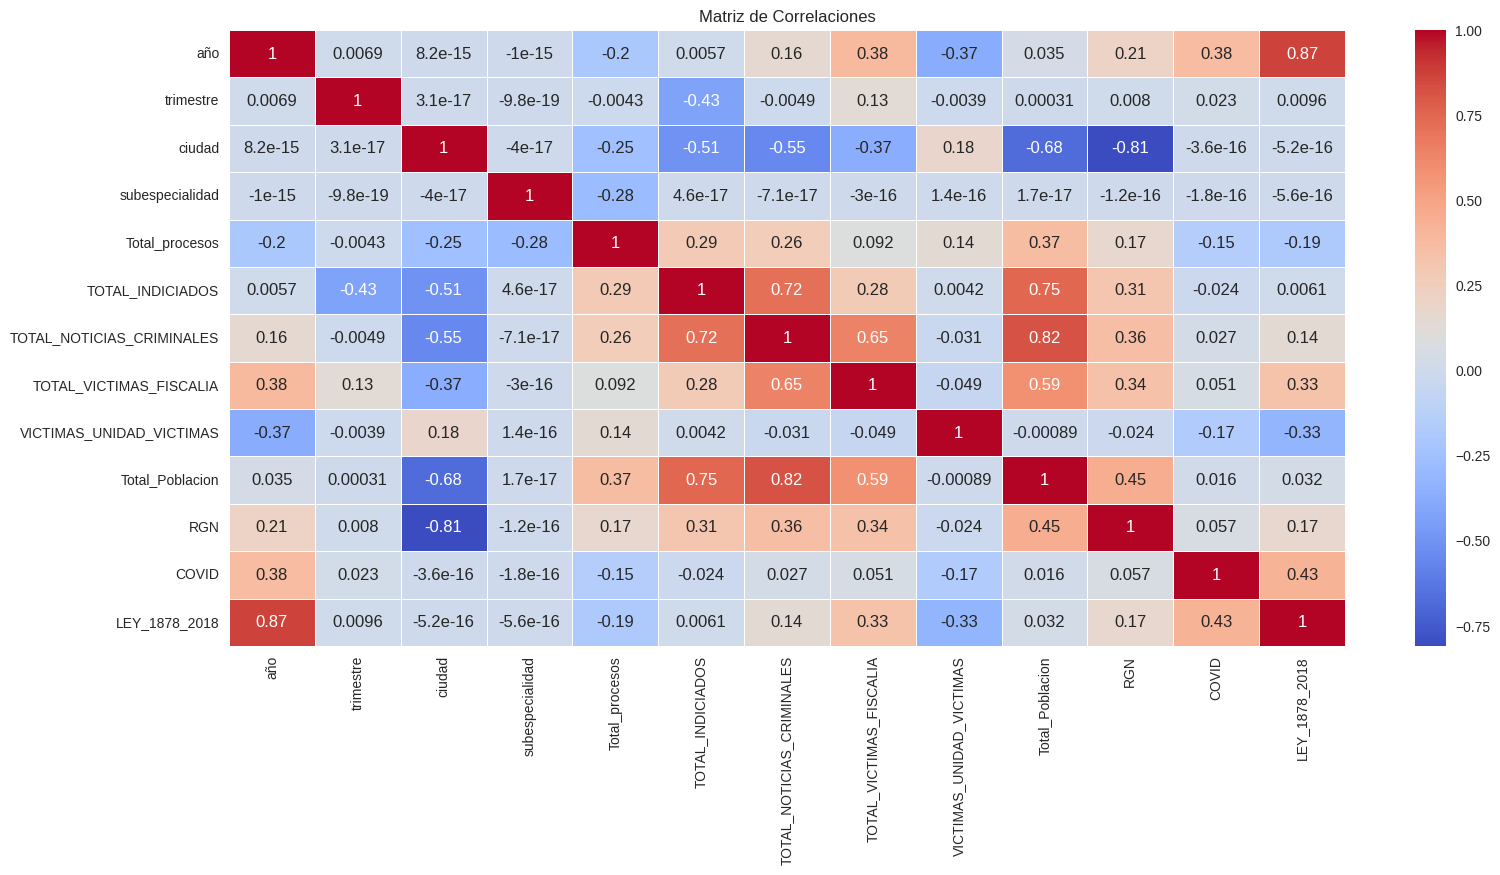

In [ ]:
correlation_matrix = df_labeled.corr()

plt.figure(figsize=(18,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

# Observaciones:

* La matriz de correlación muestra que la característica Total poblacion tiene la mayor correlacion positiva con el ingreso de procesos judiciales.

* En particular, el año tiene una correlación negativa con el ingreso de procesos judiciales en los juzgados, lo que indica que a medida que aumentan los años , se aprecia una tendencia en la disminuacion de los ingresos de procesos judiciales.

* Desde una perspectiva de multicolinealidad, total poblacion, total indiciados y total noticias criminales están altamente intercorrelacionados, lo que sugiere una posible redundancia y puede resultar beneficioso seleccionar solo una de ella.

* Los predictores clave para un modelo de prediccion de ingreso de procesos judiciales incluyen el total de poblacion,  total indiciados y total de noticias criminales.



# Tratamiento para las caracteristicas numéricas

# Distribución para las caracteristicas numéricas:



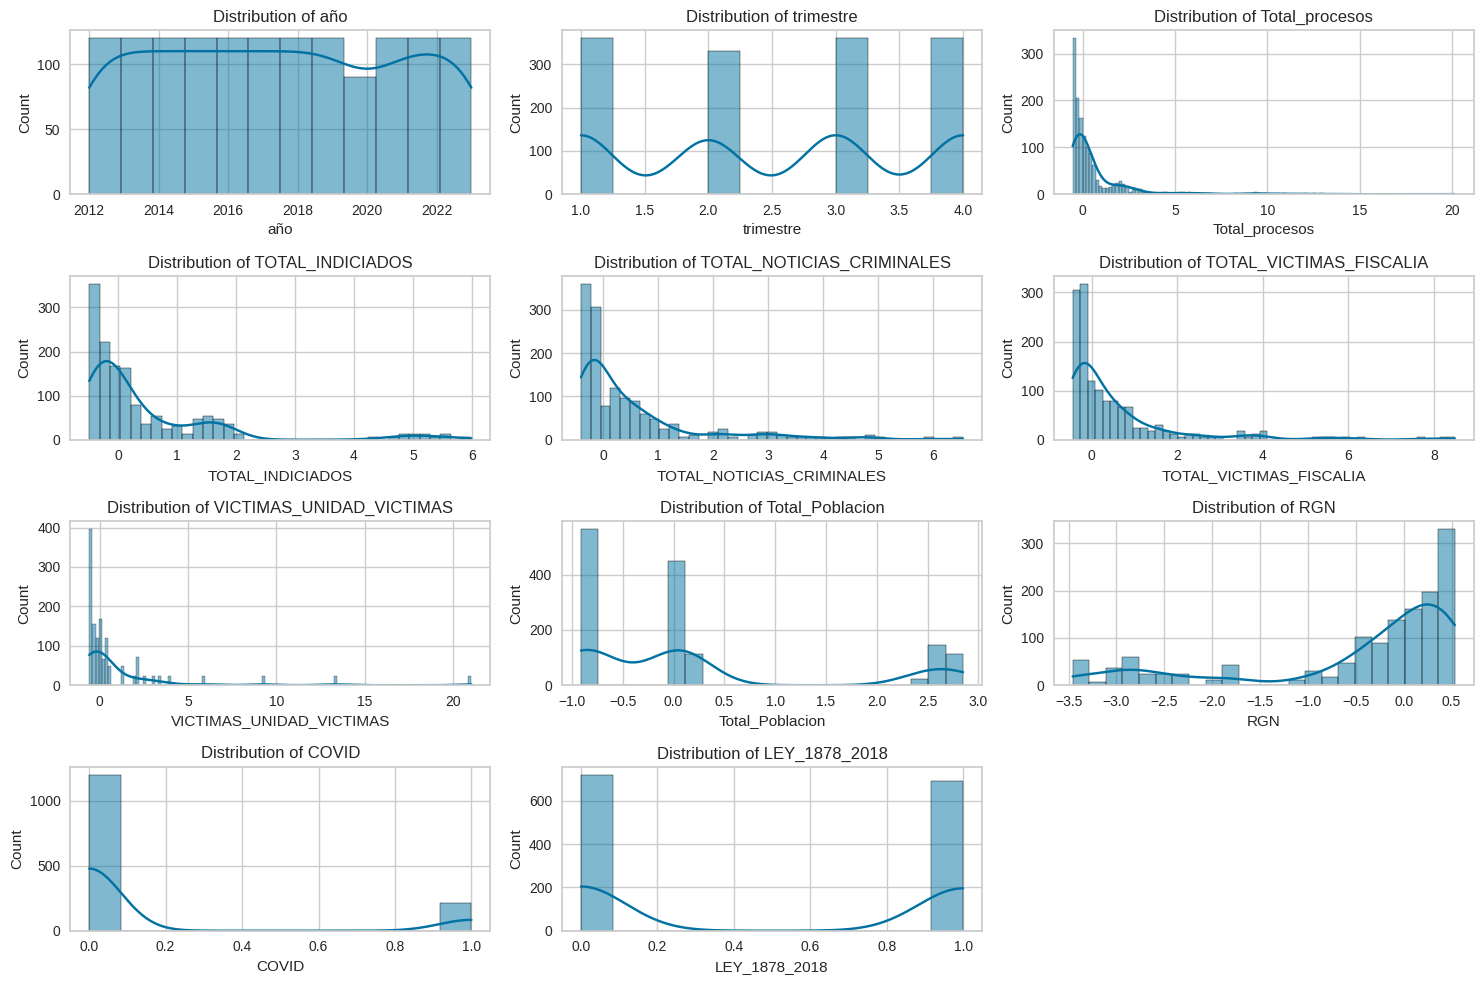

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

# Conclusiones generales de los graficos de distribucion normal generados:

La mayoría de las características exhiben distribuciones sesgadas, que son adecuadas para modelar.

Considere la multicolinealidad entre total poblacion, total indiciados y total noticias criminales.



# Matriz de Correlación para las caracteristicas numéricas

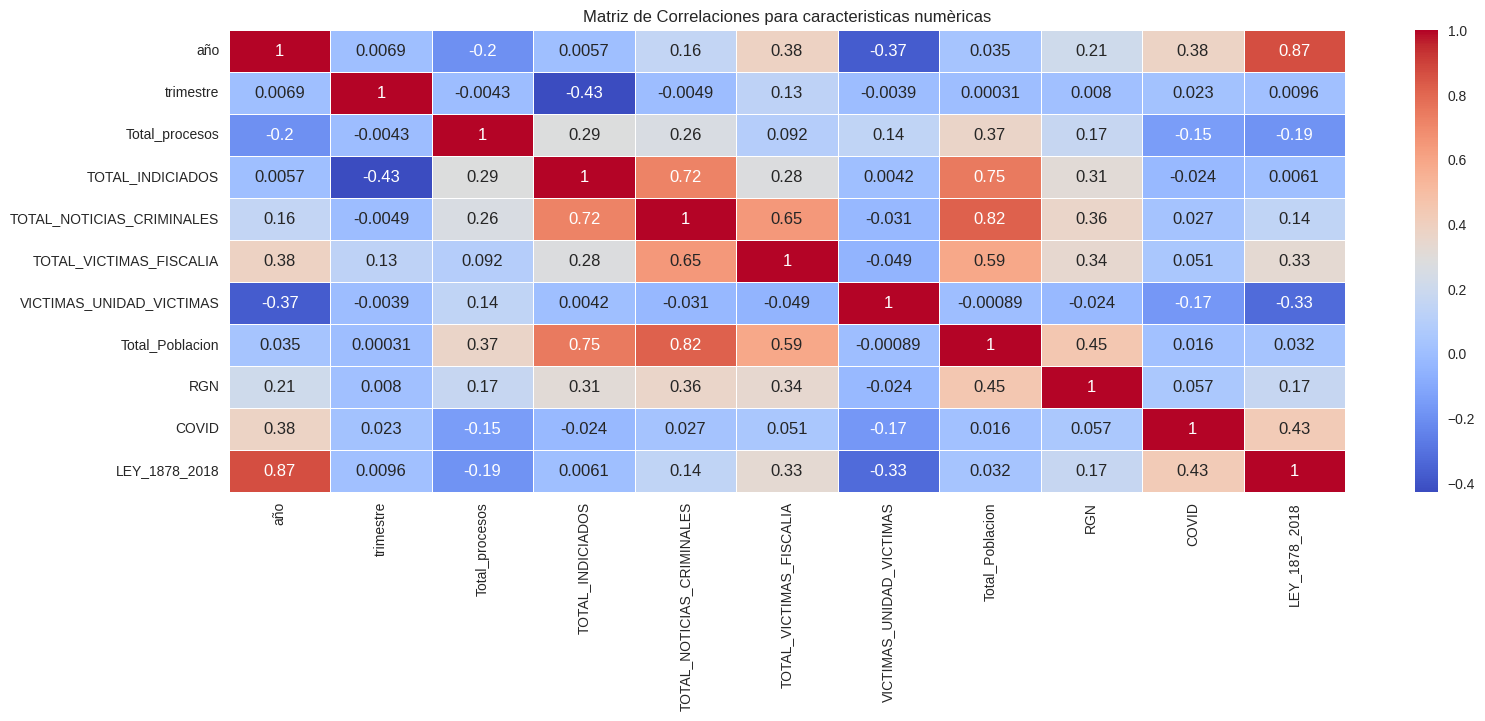

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(18,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaciones para caracteristicas numèricas')
plt.show()

# Conclusión Importante:

Estos hallazgos sugieren que eliminar algunas características altamente correlacionadas puede ayudar a reducir la multicolinealidad y mejorar el rendimiento del modelo.

Formas de solucionarla:

1. Eliminar una de las variables correlacionadas: Si dos variables contienen información redundante, puedes elegir quedarte con una.
2. Usar técnicas de reducción de dimensionalidad: Métodos como PCA (Análisis de Componentes Principales) pueden combinar variables correlacionadas en una sola.
3. Regularización: Técnicas como Ridge Regression o Lasso pueden manejar multicolinealidad al penalizar los coeficientes del modelo.


# Formas de visualizar las correlaciones entre las variables independientes y variable dependiente

<Axes: xlabel='TOTAL_INDICIADOS', ylabel='Total_procesos'>

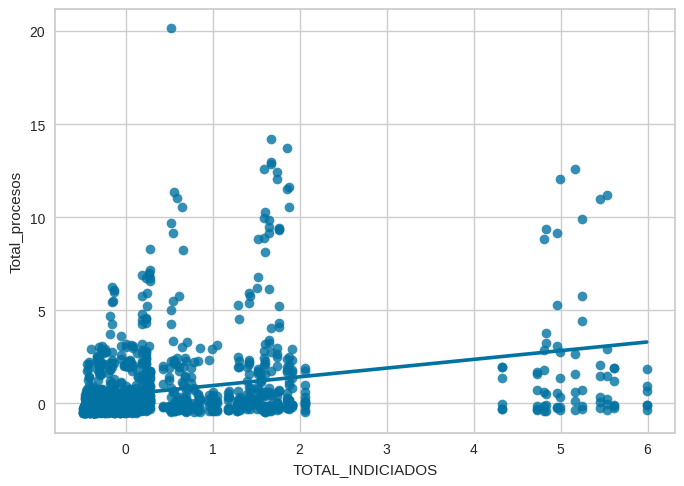

In [ ]:
# Checkear la correlación entre las caracteristicas independiente como total indiciados y la variable objetivo total procesos.
sns.regplot(x = 'TOTAL_INDICIADOS', y = 'Total_procesos', data=df, ci=None)

# Experimento elegido con mayor precisiòn.
# Algoritmo de XGBoost Regression

# 3. PIPELINE/DIVISIÓN DE DATOS

In [ ]:
# incicio con el dataset original
df = data_procesoXGBoot.copy()

In [ ]:
# Defino la variable dependiente a predecir
target = 'Total_procesos'

# Defino variables predictoras
features = ['año', 'trimestre', 'ciudad', 'subespecialidad', 'Total_Poblacion', 'TOTAL_INDICIADOS', 'TOTAL_NOTICIAS_CRIMINALES',  'RGN', 'COVID',
            'LEY_1878_2018','VICTIMAS_UNIDAD_VICTIMAS','TOTAL_VICTIMAS_FISCALIA']

# Separo el dataset en variables X y Y
X = df[features]
y = df[target]

# Pipeline de preprocesamiento
numeric_features = ['año', 'trimestre', 'Total_Poblacion','TOTAL_INDICIADOS', 'TOTAL_NOTICIAS_CRIMINALES',
                   'TOTAL_VICTIMAS_FISCALIA', 'VICTIMAS_UNIDAD_VICTIMAS',
                    'RGN', 'COVID', 'LEY_1878_2018']
categorical_features = ['ciudad', 'subespecialidad']

# Aplico escalamiento de variables numericas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Aplico encoding a variables categoricas

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
# Dividir el set de datos de pruebas y el set de datos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Mostrar el tamaño de los DataSets Resultantes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1128, 12)
X_test shape: (282, 12)
y_train shape: (1128,)
y_test shape: (282,)


In [ ]:
# Descargar los archivos de test para realizar las predicciones de prueba
X_test.to_csv('xtest.csv', index=False)
y_test.to_csv('ytest.csv', index=False)

# 4. PIPELINE/SELECCIÓN Y CONSTRUCCIÓN DEL MÓDELO

In [ ]:
# SE crea el modelo de regresion XGBoost
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=8,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42

)

# Creacion del modelo Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

# 5. PIPELINE/ENTRENAR EL MÓDELO

In [ ]:
# Entrenamiento del modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['año', 'trimestre',
                                                   'Total_Poblacion',
                                                   'TOTAL_INDICIADOS',
                                                   'TOTAL_NOTICIAS_CRIMINALES',
                                                   'TOTAL_VICTIMAS_FISCALIA',
                                                   'VICTIMAS_UNIDAD_VICTIMAS',
                                                   'RGN', 'COVID',
                                                   'LEY_1878_2018']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='i...
                              feature_types=None, gamma=0.1, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None, min_child_weight=3,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=1000,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=42, ...))])

# 6. PIPELINE/EVALUACIÓN DEL MÓDELO

In [ ]:
# Se realizan prediccionen tanto del entrenamiento como con la de test
y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

In [ ]:
# Se imprimen las predicciones del modelo y se empiezan analizar los residuos obtenidos
my_dict = {"Actual": y_test, "Prediccion": y_pred, "Residual": y_test - y_pred}
compare = pd.DataFrame(my_dict)
compare

,Actual,Prediccion,Residual
353,151,146.029007,4.970993
864,756,834.331909,-78.331909
1311,783,812.916687,-29.916687
192,5398,5060.964844,337.035156
782,5031,6525.459961,-1494.459961
...,...,...,...
1001,227,247.287781,-20.287781
610,1090,1034.397217,55.602783
188,4988,5067.229492,-79.229492
289,1904,1973.545898,-69.545898


In [ ]:
# Descargamos archivo de compararcion valor actual - valor predicho
compare.to_csv("comparacion.csv")

# Aplicamos métricas de Performance

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):

    scores = {
    i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    i+"_test": {"R2" : round(r2_score(y_test, y_pred),2),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }

    return pd.DataFrame(scores)

mlr_score = train_val(y_train, y_train_pred, y_test, y_pred, "XGBoost")
mlr_score

,XGBoost_train,XGBoost_test
R2,0.999982,0.940000
mae,12.814746,350.785248
mse,298.110718,618473.687500
rmse,17.265883,786.430981


# Definicion de la funcion para realizar predicciones individuales

In [ ]:
def hacer_prediccion_individual(modelo, año, trimestre, ciudad, subespecialidad,Total_Poblacion,TOTAL_INDICIADOS,TOTAL_NOTICIAS_CRIMINALES,RGN,COVID,LEY_1878_2018,VICTIMAS_UNIDAD_VICTIMAS,TOTAL_VICTIMAS_FISCALIA):
    """
    Función para hacer predicciones individuales de ingreso de procesos juiciales

    Parámetros:
    -----------
    modelo: Modelo de ML ya entrenado


    Retorna:
    --------
    Predicción de ingreso de procesos judiciales
    """
    # Crear un DataFrame con los valores de entrada
    datos_entrada = pd.DataFrame({
        'año': [año],
        'trimestre': [trimestre],
        'ciudad': [ciudad],
        'subespecialidad': [subespecialidad],
        'Total_Poblacion': [Total_Poblacion],
        'TOTAL_INDICIADOS': [TOTAL_INDICIADOS],
        'TOTAL_NOTICIAS_CRIMINALES': [TOTAL_NOTICIAS_CRIMINALES],
        'RGN': [RGN],
        'COVID': [COVID],
        'LEY_1878_2018': [LEY_1878_2018],
        'VICTIMAS_UNIDAD_VICTIMAS': [VICTIMAS_UNIDAD_VICTIMAS],
        'TOTAL_VICTIMAS_FISCALIA': [TOTAL_VICTIMAS_FISCALIA],


    })

    # Hacer la predicción
    prediccion = modelo.predict(datos_entrada)

    return round(prediccion[0], 2)  # Devolver el valor redondeado a 2 decimales

# Ahora hagamos algunas Predicciones individuales

In [ ]:
# Hacer una predicción utilizando el modelo XGBoost , lo llamamos Pipeline
proc_judiciales = hacer_prediccion_individual(
    modelo=pipeline,
    año=2012,
    trimestre=1,
    ciudad="Cali",
    subespecialidad="EJECUCION DE PENAS Y MEDIDAS DE SEGURIDAD",
    Total_Poblacion=90234.375,
    TOTAL_INDICIADOS=4283.166667,
    TOTAL_NOTICIAS_CRIMINALES=3211.15,
    RGN=12.35362692,
    COVID=0,
    LEY_1878_2018=0,
    VICTIMAS_UNIDAD_VICTIMAS=98.70833333,
    TOTAL_VICTIMAS_FISCALIA=767.8333333
  )

if proc_judiciales is not None:
    print(f"Procesos Judiciales Predichos: {round(proc_judiciales)}")
    Real = 2338
    Diferencia = proc_judiciales - Real
    print(f"Procesos Judiciales Reales   : {Real}")
    print(f"Diferencia de Procesos Judiciales: {round(Diferencia)}")

Procesos Judiciales Predichos: 2318
Procesos Judiciales Reales   : 2338
Diferencia de Procesos Judiciales: -20


In [ ]:
# Hacer una predicción utilizando el modelo XGBoost , lo llamamos Pipeline
proc_judiciales = hacer_prediccion_individual(
    modelo=pipeline,
    año=2025,
    trimestre=1,
    ciudad="Bogota",
    subespecialidad="PENAL PARA ADOLESCENTES CON FUNCION DE CONTROL DE GARANTIAS",
    Total_Poblacion=329470.0417,
    TOTAL_INDICIADOS=3944.533333,
    TOTAL_NOTICIAS_CRIMINALES=16127.9,
    RGN=15.90536879,
    COVID=0,
    LEY_1878_2018=1,
    VICTIMAS_UNIDAD_VICTIMAS=32.25,
    TOTAL_VICTIMAS_FISCALIA=15321.8
  )

if proc_judiciales is not None:
    print(f"Procesos Judiciales Predichos: {round(proc_judiciales)}")

Procesos Judiciales Predichos: 695


In [ ]:
# Hacer una predicción utilizando el modelo XGBoost , lo llamamos Pipeline
proc_judiciales = hacer_prediccion_individual(
    modelo=pipeline,
    año=2014,
    trimestre=3,
    ciudad="Pasto",
    subespecialidad="PENAL PARA ADOLESCENTES CON FUNCION DE CONTROL DE GARANTIAS",
    Total_Poblacion=16071.25,
    TOTAL_INDICIADOS=616.2666667,
    TOTAL_NOTICIAS_CRIMINALES=1405.8,
    RGN=1.776934178,
    COVID=0,
    LEY_1878_2018=0,
    VICTIMAS_UNIDAD_VICTIMAS=26.875,
    TOTAL_VICTIMAS_FISCALIA=1247.8
  )

if proc_judiciales is not None:
    print(f"Procesos Judiciales Predichos: {round(proc_judiciales)}")
    Real = 151
    Diferencia = proc_judiciales - Real
    print(f"Procesos Judiciales Reales   : {Real}")
    print(f"Diferencia de Procesos Judiciales: {round(Diferencia)}")

Procesos Judiciales Predichos: 146
Procesos Judiciales Reales   : 151
Diferencia de Procesos Judiciales: -5


In [ ]:
# Hacer una predicción utilizando el modelo XGBoost , lo llamamos Pipeline
proc_judiciales = hacer_prediccion_individual(
    modelo=pipeline,
    año=2023,
    trimestre=4,
    ciudad="Bogota",
    subespecialidad="PENAL ESPECIALIZADO",
    Total_Poblacion=329470.0417,
    TOTAL_INDICIADOS=3944.533333,
    TOTAL_NOTICIAS_CRIMINALES=16127.9,
    RGN=15.90536879,
    COVID=0,
    LEY_1878_2018=1,
    VICTIMAS_UNIDAD_VICTIMAS=32.25,
    TOTAL_VICTIMAS_FISCALIA=15321.8
  )

if proc_judiciales is not None:
    print(f"Procesos Judiciales Predichos: {round(proc_judiciales)}")
    Real = 783
    Diferencia = proc_judiciales - Real
    print(f"Procesos Judiciales Reales   : {Real}")
    print(f"Diferencia de Procesos Judiciales: {round(Diferencia)}")

Procesos Judiciales Predichos: 813
Procesos Judiciales Reales   : 783
Diferencia de Procesos Judiciales: 30


# Guardar el modelo 'Pipeline' con terminacion .joblib

In [ ]:
# Al final de tu script, después de entrenar el modelo
from joblib import dump

# Guardar el modelo entrenado
dump(pipeline, 'modelo_prediccion_judicial.joblib')
print("Modelo guardado como 'modelo_prediccion_judicial.joblib'")

# También podrías guardar el train_test_split si lo necesitas
# dump((X_train, X_test, y_train, y_test), 'datos_entrenamiento.joblib')

Modelo guardado como 'modelo_prediccion_judicial.joblib'
